***Delays Dataset - EDA (разведочный анализ данных)***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

file_path = 'delays.csv'
delays_df = pd.read_csv(file_path)

In [2]:
# Базовая информация о данных
print("Dataset Overview")
print(f"Shape of dataset: {delays_df.shape}")
print("\nFirst 5 rows:")
display(delays_df.head())



Dataset Overview
Shape of dataset: (9483, 12)

First 5 rows:


,ID заказа,Дата отправки,Расстояние (км),Опыт водителя (лет),Вес груза (кг),Тип груза,Погодные условия,Сезон,Время суток,День недели,Задержка доставки (дней),Группа опыта
0,OD15142,2019-01-01,1113,15.0,7733,Опасный,Снег,Зима,День,Вторник,0,11-20
1,DL98960,2019-01-01,735,9.0,7477,Обычный,Метель,Зима,Утро,Вторник,0,6-10
2,OD41368,2019-01-02,1129,13.0,7589,Обычный,Ясно,Зима,Ночь,Среда,0,11-20
3,OR96207,2019-01-02,1130,20.0,14930,Опасный,Ясно,Зима,Вечер,Среда,2,11-20
4,OD46273,2019-01-02,1201,9.0,11187,Замороженный,Ясно,Зима,Ночь,Среда,0,6-10


In [3]:
print("\nDataset Information:")
delays_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9483 entries, 0 to 9482
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID заказа                 9483 non-null   object 
 1   Дата отправки             9483 non-null   object 
 2   Расстояние (км)           9483 non-null   int64  
 3   Опыт водителя (лет)       9015 non-null   float64
 4   Вес груза (кг)            9483 non-null   int64  
 5   Тип груза                 9483 non-null   object 
 6   Погодные условия          9205 non-null   object 
 7   Сезон                     9483 non-null   object 
 8   Время суток               9483 non-null   object 
 9   День недели               9483 non-null   object 
 10  Задержка доставки (дней)  9483 non-null   int64  
 11  Группа опыта              9015 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 889.2+ KB


In [4]:
# Описательная статистика числовых данных
delays_df.select_dtypes(include=['number']).describe()

,Расстояние (км),Опыт водителя (лет),Вес груза (кг),Задержка доставки (дней)
count,9483.000000,9015.000000,9483.000000,9483.000000
mean,1000.107561,15.379479,15118.382474,0.945270
std,442.674035,6.613861,6729.053817,1.485165
min,370.000000,7.000000,6072.000000,0.000000
25%,657.000000,11.000000,10141.000000,0.000000
50%,930.000000,14.000000,13673.000000,0.000000
75%,1231.000000,18.000000,18379.500000,2.000000
max,3280.000000,49.000000,46253.000000,8.000000


In [5]:
# Для строк
delays_df.select_dtypes(include=['object', 'category']).describe()

,ID заказа,Дата отправки,Тип груза,Погодные условия,Сезон,Время суток,День недели,Группа опыта
count,9483,9483,9483,9205,9483,9483,9483,9015
unique,9323,2159,4,6,4,4,7,4
top,OD54475,2019-01-19,Обычный,Ясно,Лето,Утро,Воскресенье,11-20
freq,3,15,3563,4854,2422,2402,1384,4961


In [6]:
# Пустые данные
print("\nMissing Values Analysis")
missing_counts = delays_df.isnull().sum()
missing_percent = (missing_counts / len(delays_df)) * 100
missing_data = pd.DataFrame({'Missing Count': missing_counts, 'Missing Percentage': missing_percent})
display(missing_data)



Missing Values Analysis


,Missing Count,Missing Percentage
ID заказа,0,0.000000
Дата отправки,0,0.000000
Расстояние (км),0,0.000000
Опыт водителя (лет),468,4.935147
Вес груза (кг),0,0.000000
Тип груза,0,0.000000
Погодные условия,278,2.931562
Сезон,0,0.000000
Время суток,0,0.000000
День недели,0,0.000000


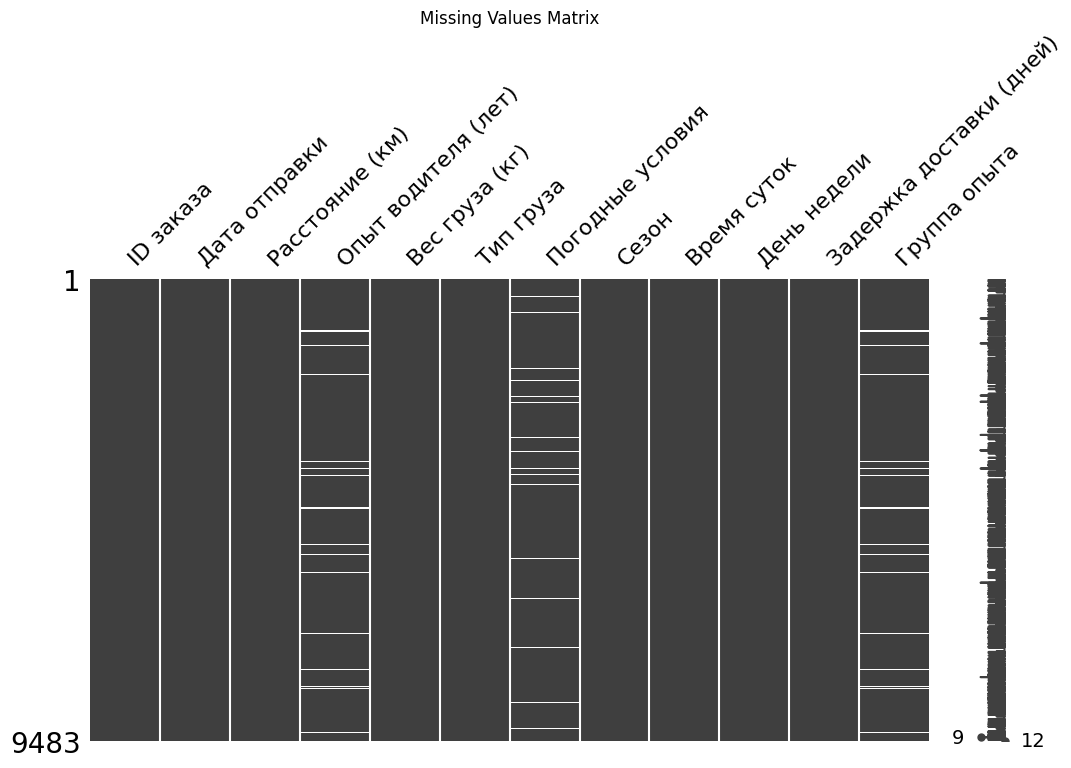

In [7]:
# Пустые данные визуально
msno.matrix(delays_df, figsize=(12,6))
plt.title('Missing Values Matrix')
plt.show()

In [8]:
# Повторы
duplicate_count = delays_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [9]:
# Уникальные значения
print("\nUnique Values per Column")
for col in delays_df.columns:
    print(f"{col}: {delays_df[col].nunique()} unique values")


Unique Values per Column
ID заказа: 9323 unique values
Дата отправки: 2159 unique values
Расстояние (км): 1762 unique values
Опыт водителя (лет): 39 unique values
Вес груза (кг): 7482 unique values
Тип груза: 4 unique values
Погодные условия: 6 unique values
Сезон: 4 unique values
Время суток: 4 unique values
День недели: 7 unique values
Задержка доставки (дней): 9 unique values
Группа опыта: 4 unique values


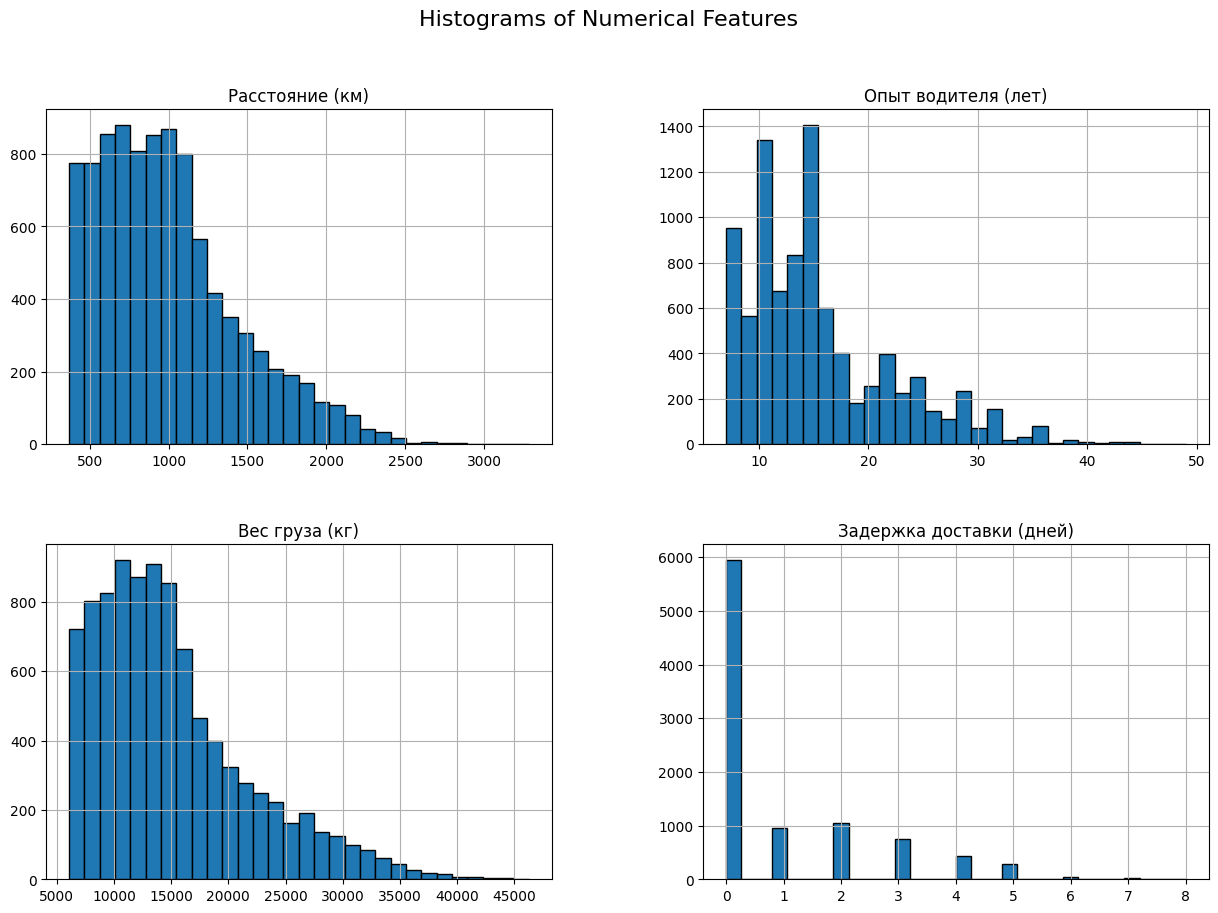

In [10]:
# Распределение признаков
numeric_cols = delays_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = delays_df.select_dtypes(include=['object']).columns.tolist()


if numeric_cols:
    delays_df[numeric_cols].hist(bins=30, figsize=(15,10), edgecolor='black')
    plt.suptitle('Histograms of Numerical Features', fontsize=16)
    plt.show()




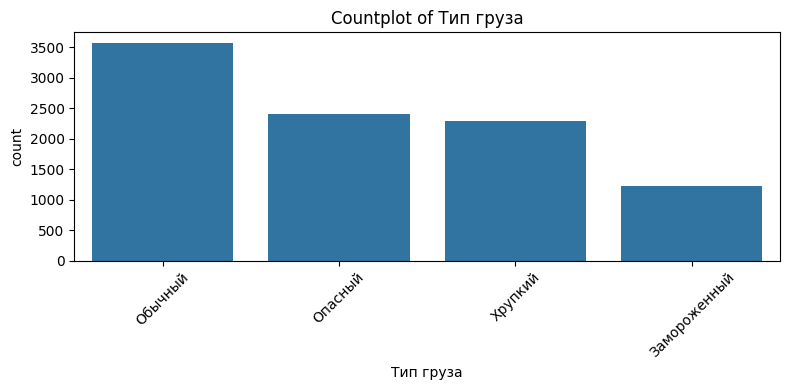

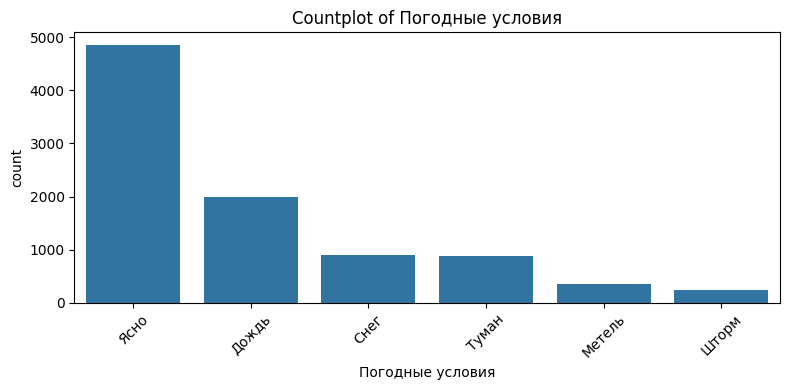

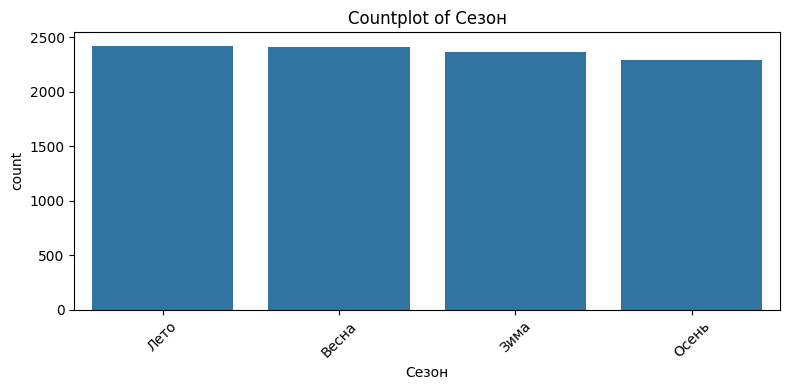

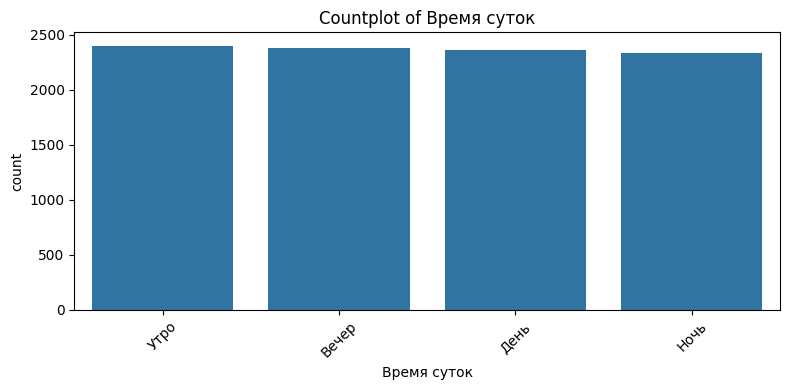

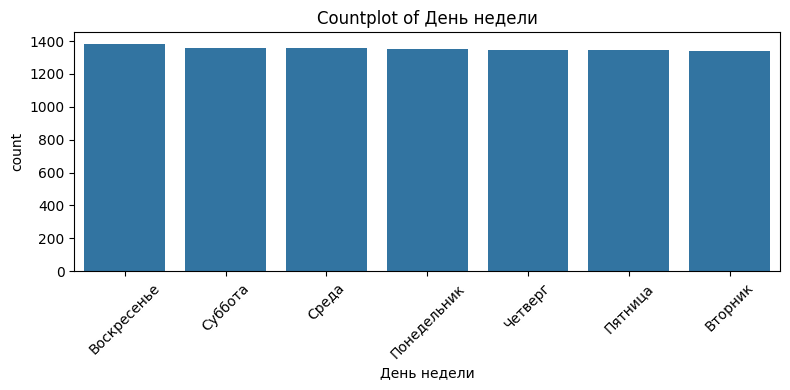

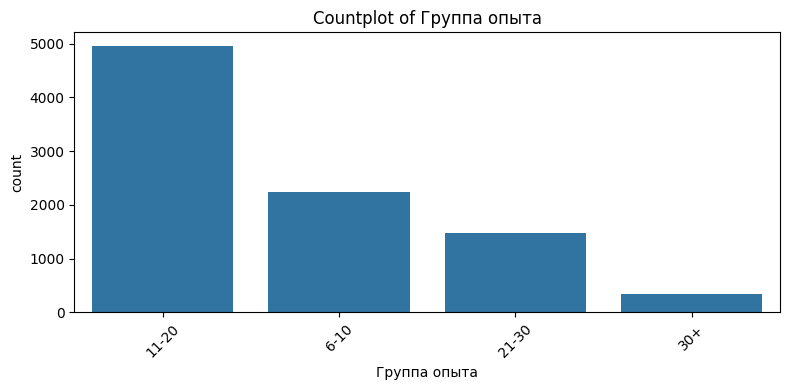

In [11]:
for col in categorical_cols:
    if col not in ['ID заказа', 'Дата отправки']:
        plt.figure(figsize=(8,4))
        sns.countplot(data=delays_df, x=col, order=delays_df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


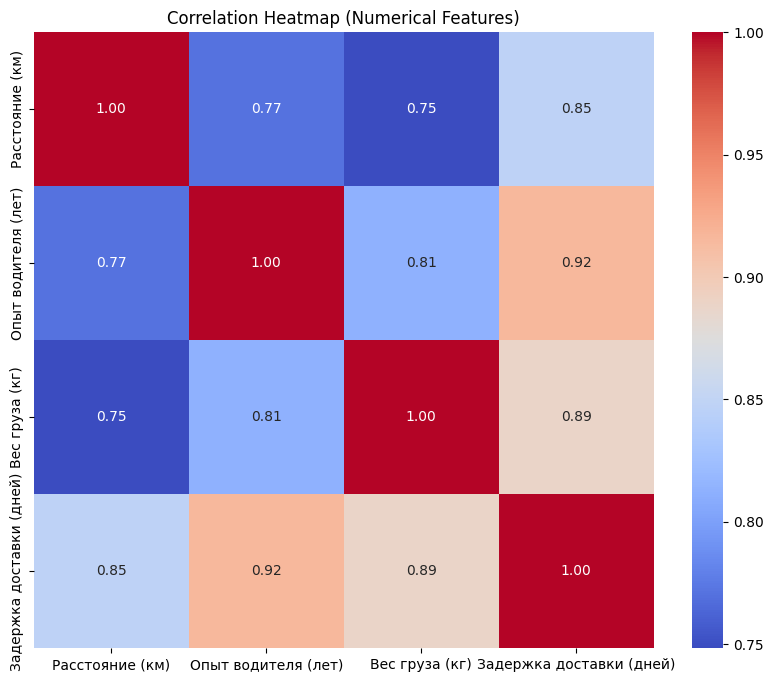

In [12]:
# Двумерный анализ
# Correlation Heatmap
if len(numeric_cols) > 1:
    plt.figure(figsize=(10,8))
    sns.heatmap(delays_df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Numerical Features)')
    plt.show()



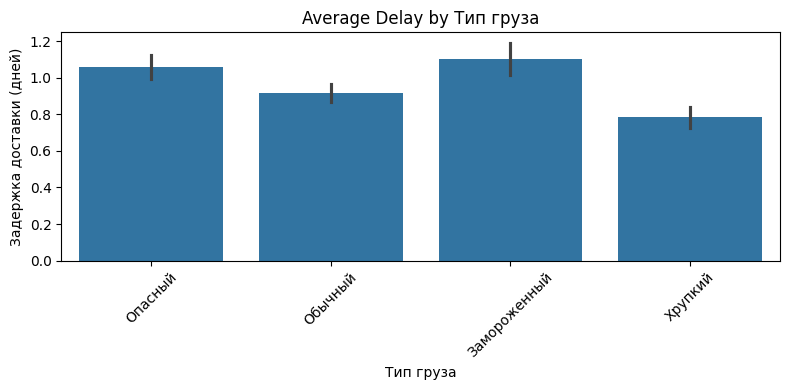

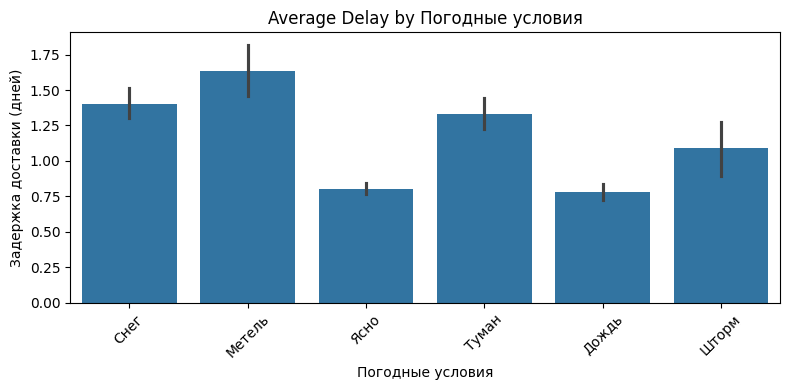

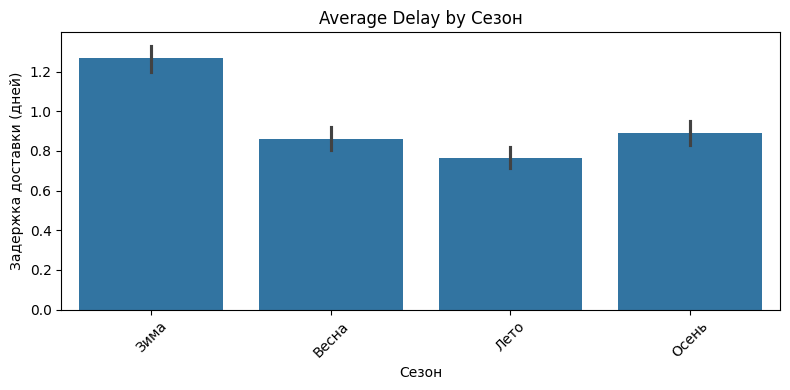

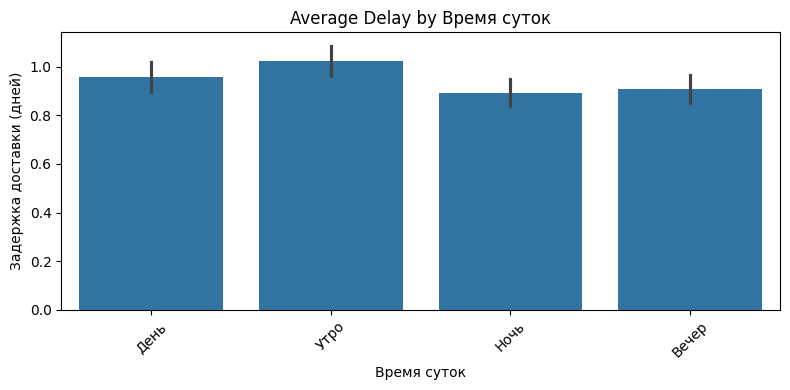

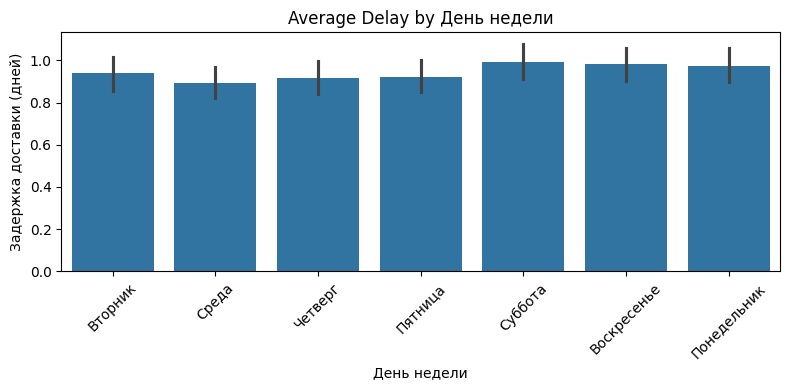

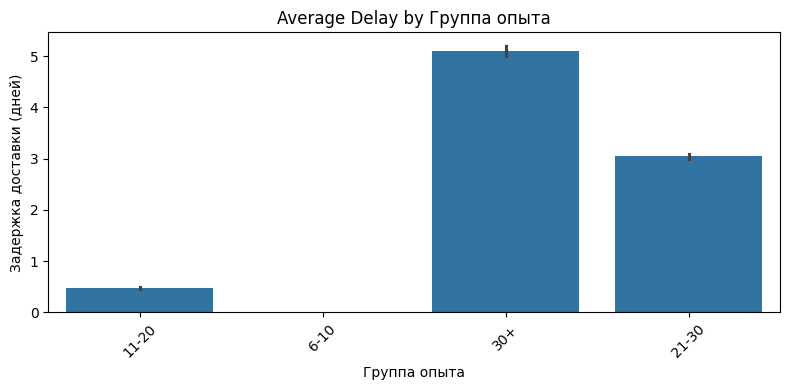

In [13]:
exclude_cols = ['ID заказа', 'Дата отправки', 'Задержка доставки (дней)']

if 'Задержка доставки (дней)' in delays_df.columns:
    for col in categorical_cols:
        if col not in exclude_cols:
            plt.figure(figsize=(8,4))
            sns.barplot(x=col, y='Задержка доставки (дней)', data=delays_df, estimator=lambda x: np.mean(x))
            plt.title(f'Average Delay by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()



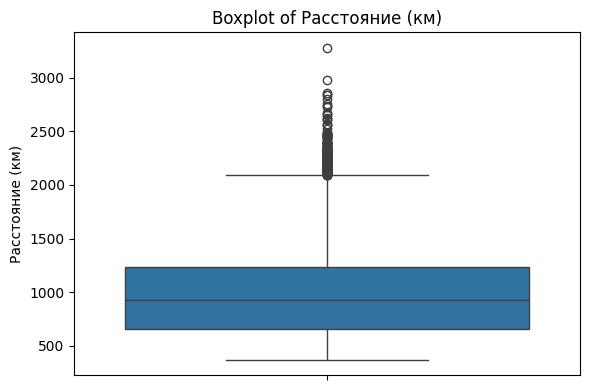

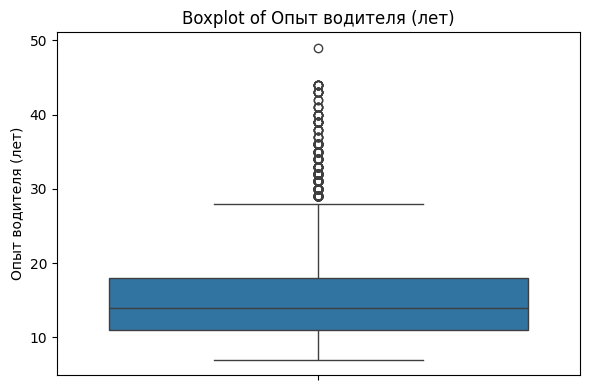

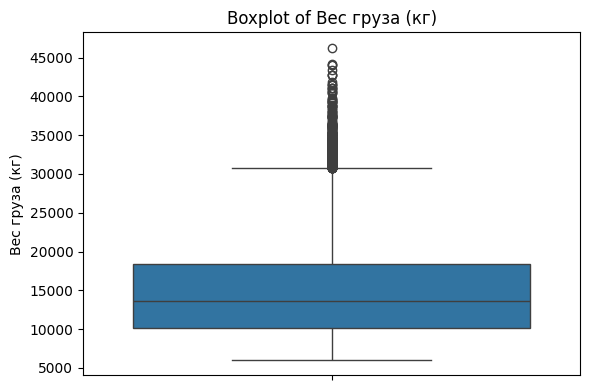

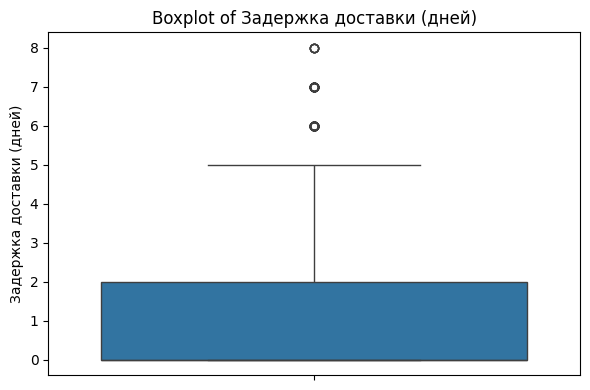

In [14]:
# Аномалии
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=delays_df, y=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [15]:
# Выводы
print("\nВыводы разведочного анализа")
print("- В датасете", delays_df.shape[0], "строк и", delays_df.shape[1], "столбцов.")
print("- Найдено", duplicate_count, "одинаковых строк.")
print("- Найденные пустые значения:")
display(missing_data[missing_data['Missing Count'] > 0])

if len(numeric_cols) > 0:
    print("- Численные значения:", numeric_cols)
else:
    print("- Нет численных значений.")

if len(categorical_cols) > 0:
    print("- Категориальные значения:", categorical_cols)
else:
    print("- Нет категориальных значений.")



Выводы разведочного анализа
- В датасете 9483 строк и 12 столбцов.
- Найдено 0 одинаковых строк.
- Найденные пустые значения:


,Missing Count,Missing Percentage
Опыт водителя (лет),468,4.935147
Погодные условия,278,2.931562
Группа опыта,468,4.935147


- Численные значения: ['Расстояние (км)', 'Опыт водителя (лет)', 'Вес груза (кг)', 'Задержка доставки (дней)']
- Категориальные значения: ['ID заказа', 'Дата отправки', 'Тип груза', 'Погодные условия', 'Сезон', 'Время суток', 'День недели', 'Группа опыта']
